# TLE Propagation

This is a short example of how to propage NASA Two Line Elements (TLE) in the python-wrapped orekit.

In [1]:
%pylab inline
figsize(15,15)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#initialize orekit and JVM
import orekit
orekit.initVM()

from orekit.pyhelpers import setup_orekit_curdir
setup_orekit_curdir()

Now we are set up to import and use objects from the orekit library.

In [3]:
from org.orekit.data import DataProvidersManager, ZipJarCrawler
from org.orekit.frames import FramesFactory, TopocentricFrame
from org.orekit.bodies import OneAxisEllipsoid, GeodeticPoint
from org.orekit.time import TimeScalesFactory, AbsoluteDate, DateComponents, TimeComponents
from org.orekit.utils import IERSConventions, Constants

from org.orekit.propagation.analytical.tle import TLE, TLEPropagator
from java.io import File

from math import radians, pi

In [4]:
#SPOT-5 
tle_line1 = "1 27421U 02021A   02124.48976499 -.00021470  00000-0 -89879-2 0    20"
tle_line2 = "2 27421  98.7490 199.5121 0001333 133.9522 226.1918 14.26113993    62"

In [5]:
mytle = TLE(tle_line1,tle_line2)
print mytle
print 'Epoch :',mytle.getDate()

1 27421U 02021A   02124.48976499 -.00021470  00000-0 -89879-2 0    20
2 27421  98.7490 199.5121 0001333 133.9522 226.1918 14.26113993    62
Epoch : 2002-05-04T11:45:15.695


In [6]:
ITRF = FramesFactory.getITRF(IERSConventions.IERS_2010, True)
earth = OneAxisEllipsoid(Constants.WGS84_EARTH_EQUATORIAL_RADIUS, 
                         Constants.WGS84_EARTH_FLATTENING, 
                         ITRF)

## Define the station

In [7]:
longitude = radians(21.063)
latitude  = radians(67.878)
altitude  = 341.0
station1 = GeodeticPoint(latitude, longitude, altitude)
sta1Frame = TopocentricFrame(earth, station1, "Esrange")

In [8]:
initialDate = AbsoluteDate(DateComponents(2002, 05, 07),
                           TimeComponents.H00,
                           TimeScalesFactory.getUTC())

inertialFrame = FramesFactory.getEME2000()

propagator = TLEPropagator.selectExtrapolator(mytle)

In [9]:
extrapDate = initialDate;
finalDate = extrapDate.shiftedBy(60.0*60*24) #seconds

In [10]:
el=[]
pos=[]

In [11]:
while (extrapDate.compareTo(finalDate) <= 0.0):  
    pv = propagator.getPVCoordinates(extrapDate, inertialFrame)
    pos_tmp = pv.getPosition()
    vel_tmp = pv.getVelocity()
    pos.append((pos_tmp.getX(),pos_tmp.getY(),pos_tmp.getZ()))
    
    el_tmp = sta1Frame.getElevation(pv.getPosition(),
                    inertialFrame,
                    extrapDate)*180.0/pi
    el.append(el_tmp)
    #print extrapDate, pos_tmp, vel_tmp
    extrapDate = extrapDate.shiftedBy(10.0)

## Plot Results

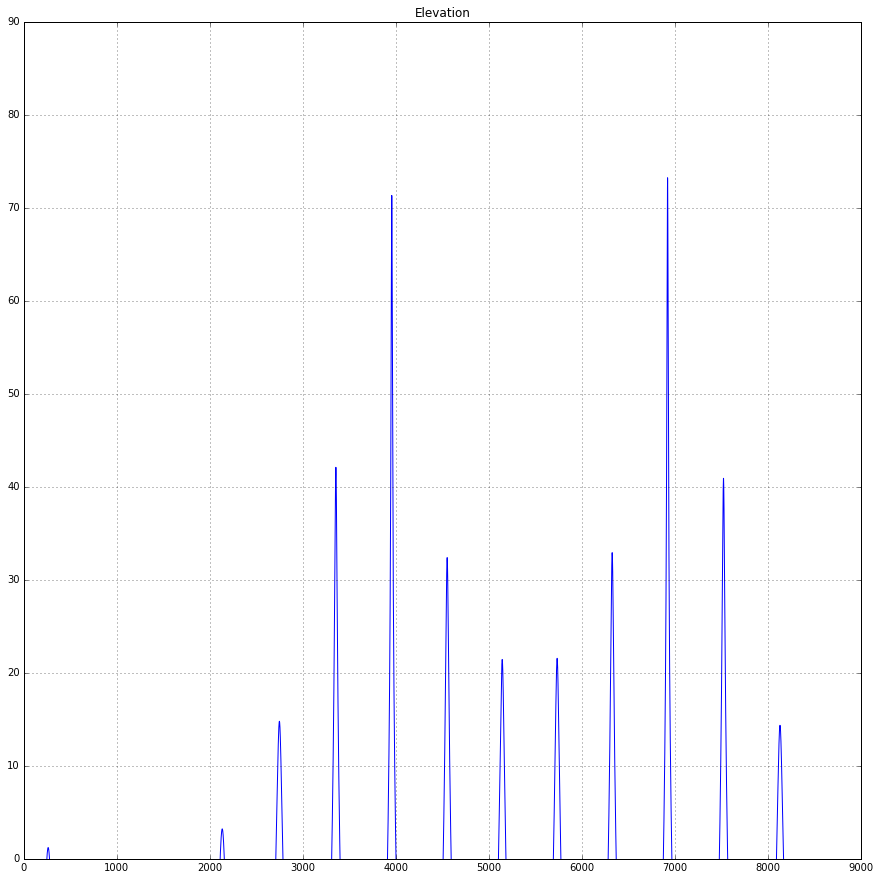

In [12]:
plot(el)
ylim(0,90)
title('Elevation')
grid(True)

In [13]:
plt.figure()
plt.plot(pos); 
plt.title('Inertial position')
plt.show()